<a href="https://colab.research.google.com/github/kaicmurilo/ia_facial_detection/blob/main/trinamento_pronto_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


fname = 'fer2013.tar.gz'

if fname.endswith("tar.gz"):
    with tarfile.open(fname, "r:gz") as tar:
        tar.extractall()
elif fname.endswith("tar"):
    with tarfile.open(fname, "r:") as tar:
        tar.extractall()


df = pd.read_csv("fer2013/fer2013.csv")
df.head()


label_to_text = {
    0: "Bravo",
    1: "Desgosto",
    2: "Medo",
    3: "Feliz",
    4: "Triste",
    5: "Surpresa",
    6: "Neutro",
}

img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))

img_array = np.stack(img_array, axis=0)

labels = df.emotion.values
X_train, X_test, y_train, y_test = train_test_split(img_array, labels, test_size=0.2)

X_train = X_train / 255
X_test = X_test / 255

basemodel = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(7, activation="softmax"),
])

basemodel.summary()

basemodel.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

try:
    os.mkdir("checkpoint")
except FileExistsError:
    pass

file_name = 'best_model.h5'
checkpoint_path = os.path.join('checkpoint', file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    verbose=1,
    save_freq='epoch',
    save_best_only=True,
    save_weights_only=False,
    mode='max'
)

basemodel.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[call_back])

final_model = tf.keras.models.load_model(checkpoint_path)



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 23, 23, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


712/718 [============================>.] - ETA: 0s - loss: 1.3442 - accuracy: 0.4957
Epoch 2: val_accuracy improved from 0.39916 to 0.44357, saving model to checkpoint/best_model.h5
718/718 [==============================] - 4s 6ms/step - loss: 1.3440 - accuracy: 0.4961 - val_loss: 1.4822 - val_accuracy: 0.4436
Epoch 3/50
711/718 [============================>.] - ETA: 0s - loss: 1.1764 - accuracy: 0.5665
Epoch 3: val_accuracy improved from 0.44357 to 0.46900, saving model to checkpoint/best_model.h5
718/718 [==============================] - 5s 6ms/step - loss: 1.1767 - accuracy: 0.5666 - val_loss: 1.4537 - val_accuracy: 0.4690
Epoch 4/50
708/718 [============================>.] - ETA: 0s - loss: 1.0414 - accuracy: 0.6220
Epoch 4: val_accuracy improved from 0.46900 to 0.47945, saving model to checkpoint/best_model.h5
718/718 [==============================] - 4s 6ms/step - loss: 1.0414 - accuracy: 0.6222 - val_loss: 1.4364 - val_accuracy: 0.4794
Epoch 5/50
717/718 [===================

Label atual é Surpresa
1/1 [==============================] - 0s 26ms/step
Label previsto é Surpresa


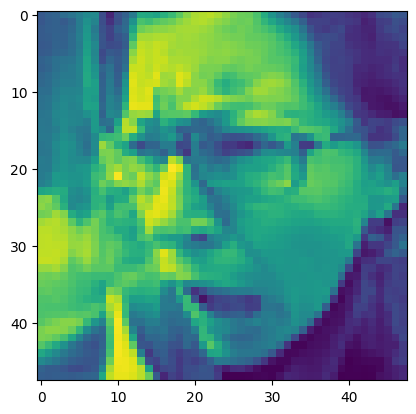

In [24]:
from IPython.display import clear_output
import time

for k in range(40):
    print(f"Label atual é {label_to_text[y_test[k]]}")
    predicted_class = final_model.predict(tf.expand_dims(X_test[k], 0)).argmax()
    print(f"Label previsto é {label_to_text[predicted_class]}")
    plt.imshow(X_test[k].reshape((48, 48)))
    plt.show()
    time.sleep(3)
    clear_output(wait=True)

1/1 [==============================] - 0s 98ms/step


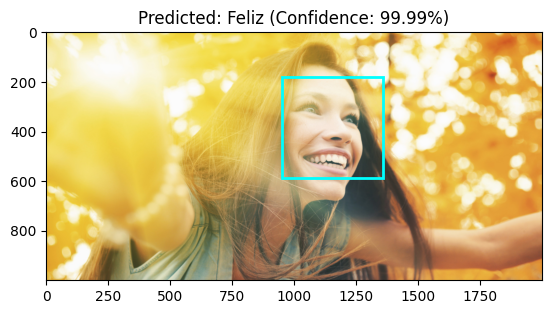

1/1 [==============================] - 0s 18ms/step


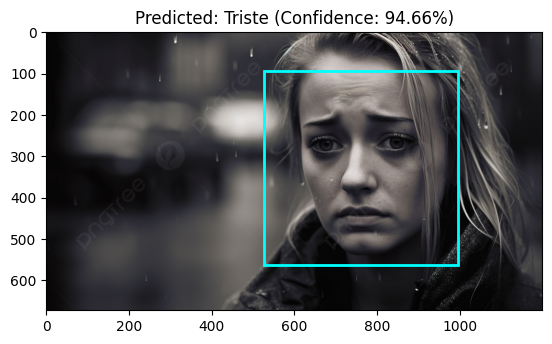

1/1 [==============================] - 0s 19ms/step


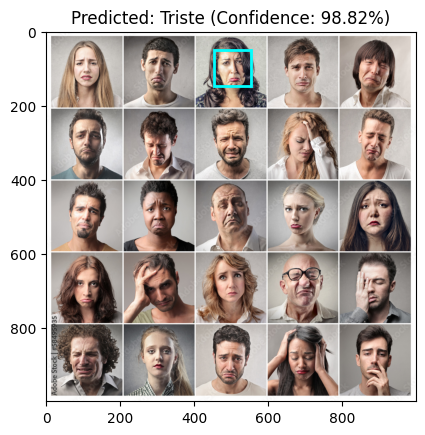

1/1 [==============================] - 0s 19ms/step


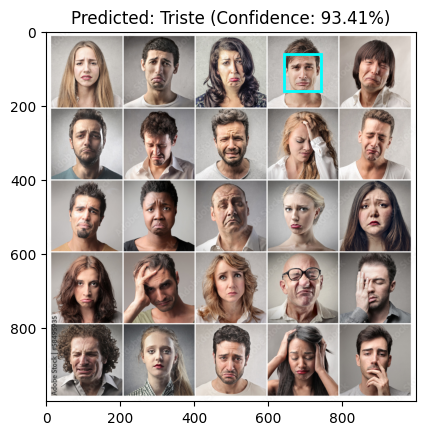

1/1 [==============================] - 0s 44ms/step


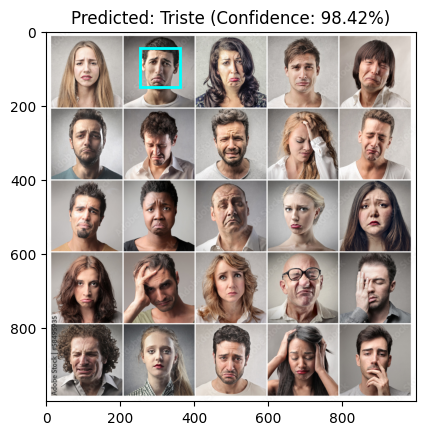

1/1 [==============================] - 0s 43ms/step


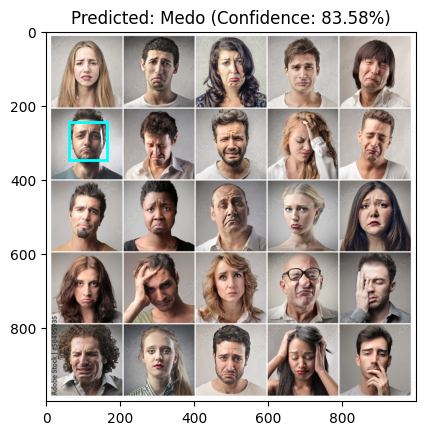

1/1 [==============================] - 0s 43ms/step


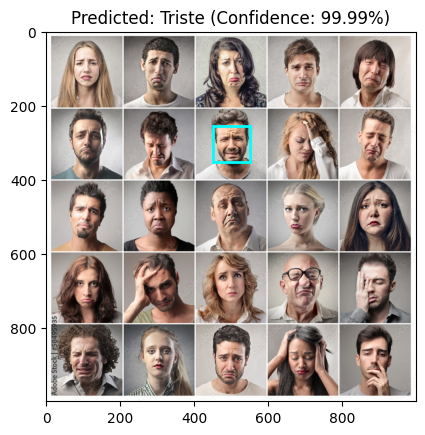

1/1 [==============================] - 0s 28ms/step


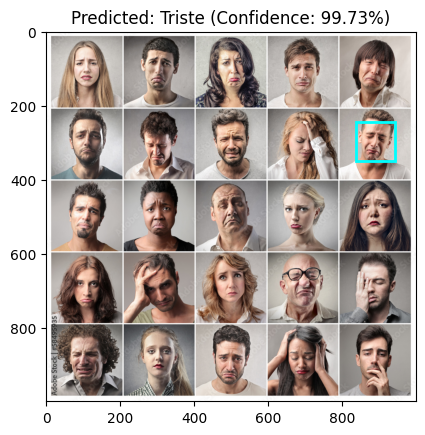

1/1 [==============================] - 0s 33ms/step


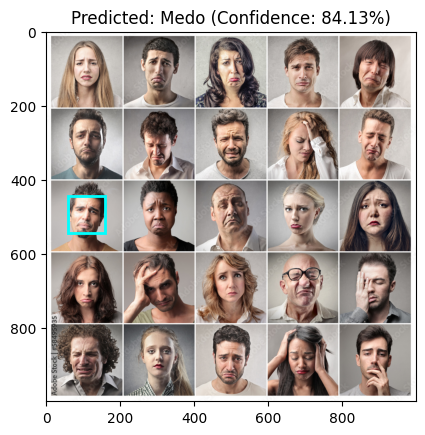

1/1 [==============================] - 0s 43ms/step


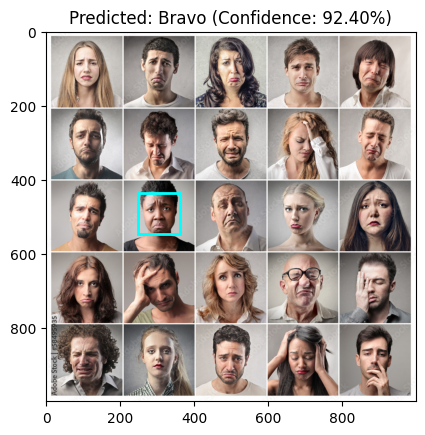

1/1 [==============================] - 0s 27ms/step


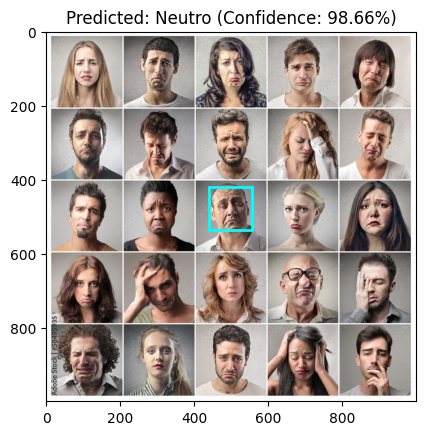

1/1 [==============================] - 0s 43ms/step


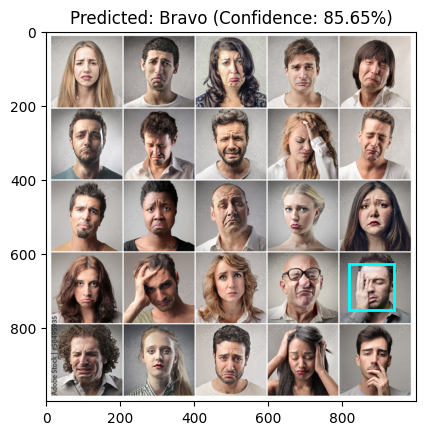

1/1 [==============================] - 0s 34ms/step


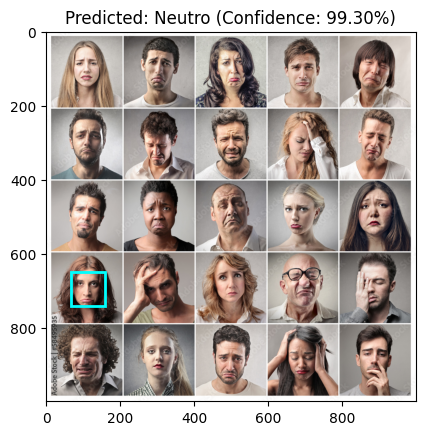

1/1 [==============================] - 0s 25ms/step


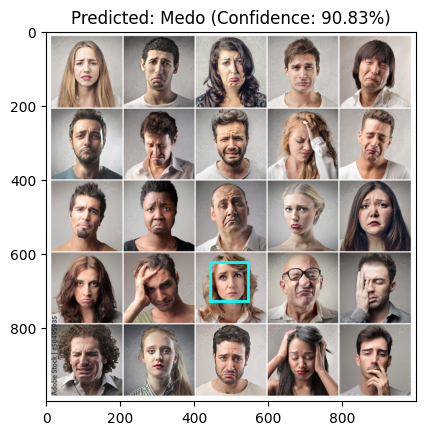

1/1 [==============================] - 0s 28ms/step


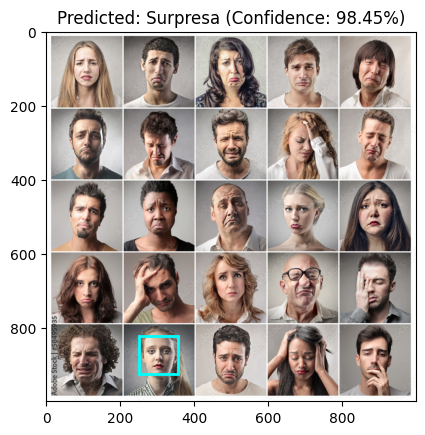

1/1 [==============================] - 0s 25ms/step


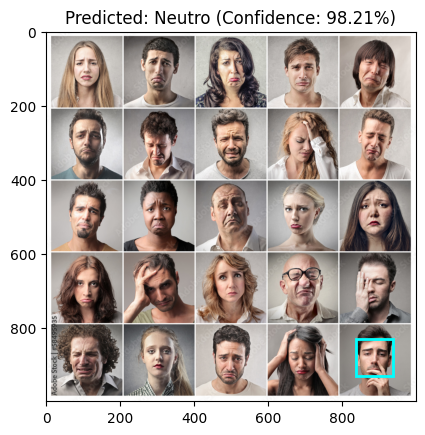

1/1 [==============================] - 0s 27ms/step


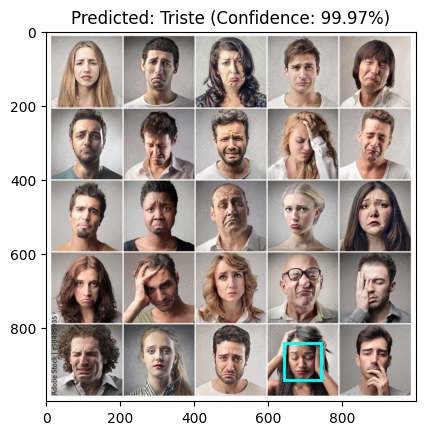

In [51]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt


model_path = 'checkpoint/best_model.h5'
trained_model = load_model(model_path)


image_folder_path = 'images'


label_to_text = {
    0: "Bravo",
    1: "Desgosto",
    2: "Medo",
    3: "Feliz",
    4: "Triste",
    5: "Surpresa",
    6: "Neutro",
}


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def predict_emotion(image_path):

    img = cv2.imread(image_path)

    if img is None:
        print(f"Error loading image: {image_path}")
        return


    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    if len(faces) == 0:
        print(f"No faces detected in: {image_path}")
        return

    for (x, y, w, h) in faces:

        face_roi = gray[y:y+h, x:x+w]


        if w < 30 or h < 30:
            print(f"Skipped small face in: {image_path}")
            continue


        face_roi_resized = cv2.resize(face_roi, (48, 48))


        face_roi_resized = face_roi_resized / 255.0


        predictions = trained_model.predict(np.expand_dims(face_roi_resized, axis=0))
        predicted_class = np.argmax(predictions)
        confidence = np.max(predictions) * 100


        if confidence > 70:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.gca().add_patch(plt.Rectangle((x, y), w, h, color='cyan', linewidth=2, fill=False))
            plt.title(f"Predicted: {label_to_text[predicted_class]} (Confidence: {confidence:.2f}%)")
            plt.show()


for filename in os.listdir(image_folder_path):
    if any(filename.lower().endswith(ext) for ext in ['.jpg', '.jpeg', '.png', '.gif', '.bmp']):
        image_path = os.path.join(image_folder_path, filename)


        predict_emotion(image_path)
